In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
X = pd.read_csv('https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2017.T.csv', encoding='utf-8')

In [3]:
from sklearn import preprocessing

x = X[X['5'] == 0]
x = x[x['3'] == 'United States of America']
x_ = x[['UserID', '1', '2', '9', '32', '33', '34', '89']]
x__ = x_.replace([-1, '-1'], np.nan)
x___ = x__.copy()
_x = x___.rename(columns={
    '1': 'age',
    '2': 'gender',
    '9': 'tech_company',
    '32': 'past',
    '33': 'current',
    '34': 'diagnosed',
    '89': 'race'
})
min_max_scaler = preprocessing.MinMaxScaler()
_x['age'] = min_max_scaler.fit_transform(_x['age'].values.reshape(-1, 1))
_x['gender'] = _x['gender'].str.lower()
_x['gender'] = _x['gender'].transform(lambda x: x if (x == 'male' or x == 'female') else 'lgbt+')
_x['past'] = _x['past'].str.lower()
_x['current'] = _x['current'].transform(lambda x: int(x == 'Yes'))
_x['diagnosed'] = _x['diagnosed'].transform(lambda x: int(x == 'Yes'))
_x['race'] = _x['race'].str.lower()
__x = _x[_x['race'] != 'i prefer not to answer']

gender = pd.get_dummies(__x['gender'], prefix='gender')
n_x = pd.concat([__x, gender], axis=1)

past = pd.get_dummies(__x['past'], prefix='past')
n_x_ = pd.concat([n_x, past], axis=1)

race = pd.get_dummies(__x['race'], prefix='race')
n_x__ = pd.concat([n_x_, race], axis=1)

n__x = n_x__.drop(columns=['gender', 'past', 'race'])
n__x_ = n__x.set_index('UserID')
n__x_

,age,tech_company,current,diagnosed,gender_female,gender_lgbt+,gender_male,past_don't know,past_no,past_possibly,past_yes,race_asian,race_black or african american,race_more than one of the above,race_white
UserID,,,,,,,,,,,,,,,
2696,0.333333,1,1,1,0,0,1,0,0,0,1,0,0,0,1
2697,0.022222,1,1,1,0,0,1,0,1,0,0,0,0,0,1
2699,0.200000,1,0,0,0,0,1,0,1,0,0,0,0,0,1
2700,0.333333,1,1,1,1,0,0,0,1,0,0,1,0,0,0
2701,0.377778,1,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,0.288889,1,0,0,0,0,1,0,1,0,0,0,0,0,1
3443,0.177778,1,1,1,0,0,1,0,0,1,0,0,0,0,1
3444,0.377778,0,0,0,0,0,1,0,0,0,1,0,0,0,1


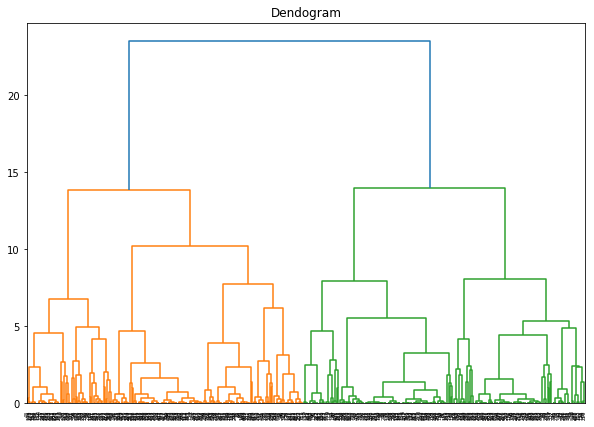

In [4]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(n__x_, method='ward'))

In [5]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
arr = cluster.fit_predict(n__x_)

In [6]:
n__x_[arr == 0]

,age,tech_company,current,diagnosed,gender_female,gender_lgbt+,gender_male,past_don't know,past_no,past_possibly,past_yes,race_asian,race_black or african american,race_more than one of the above,race_white
UserID,,,,,,,,,,,,,,,
2699,0.200000,1,0,0,0,0,1,0,1,0,0,0,0,0,1
2733,0.422222,1,0,0,0,0,1,0,0,1,0,0,0,0,1
2737,0.422222,1,0,0,0,0,1,0,0,1,0,0,1,0,0
2762,0.533333,1,0,0,0,0,1,0,1,0,0,0,0,0,1
2763,0.044444,1,0,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,0.511111,1,0,0,0,0,1,0,1,0,0,0,0,0,1
3441,0.577778,1,0,0,0,0,1,0,1,0,0,0,0,0,1
3442,0.288889,1,0,0,0,0,1,0,1,0,0,0,0,0,1


In [7]:
n__x_[arr == 1]

,age,tech_company,current,diagnosed,gender_female,gender_lgbt+,gender_male,past_don't know,past_no,past_possibly,past_yes,race_asian,race_black or african american,race_more than one of the above,race_white
UserID,,,,,,,,,,,,,,,
2707,0.022222,1,1,0,1,0,0,0,0,0,0,0,0,0,1
2708,0.288889,1,1,1,1,0,0,0,0,0,1,0,1,0,0
2716,0.355556,0,1,1,1,0,0,0,0,0,1,0,0,0,1
2720,1.000000,0,1,1,1,0,0,0,0,0,1,0,0,0,1
2721,0.222222,0,1,1,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,0.222222,1,0,0,0,1,0,1,0,0,0,0,0,0,1
3429,0.222222,1,1,1,1,0,0,0,0,0,1,0,0,0,1
3432,0.466667,1,1,1,1,0,0,0,0,0,1,0,0,0,1


In [8]:
n__x_[arr == 2]

,age,tech_company,current,diagnosed,gender_female,gender_lgbt+,gender_male,past_don't know,past_no,past_possibly,past_yes,race_asian,race_black or african american,race_more than one of the above,race_white
UserID,,,,,,,,,,,,,,,
2696,0.333333,1,1,1,0,0,1,0,0,0,1,0,0,0,1
2697,0.022222,1,1,1,0,0,1,0,1,0,0,0,0,0,1
2704,0.422222,0,1,1,0,0,1,0,0,1,0,0,0,0,1
2705,0.311111,1,1,1,0,0,1,0,0,0,1,0,0,0,1
2709,0.155556,0,1,1,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,0.288889,1,1,1,0,0,1,0,0,0,1,0,0,0,1
3410,0.200000,1,1,1,0,0,1,0,0,0,1,0,0,0,1
3431,0.333333,1,1,1,0,0,1,0,0,0,1,0,0,0,1


In [9]:
n__x_[arr == 3]

,age,tech_company,current,diagnosed,gender_female,gender_lgbt+,gender_male,past_don't know,past_no,past_possibly,past_yes,race_asian,race_black or african american,race_more than one of the above,race_white
UserID,,,,,,,,,,,,,,,
2700,0.333333,1,1,1,1,0,0,0,1,0,0,1,0,0,0
2701,0.377778,1,0,0,1,0,0,0,1,0,0,0,0,0,1
2761,0.311111,1,0,0,1,0,0,0,0,1,0,0,0,0,1
2769,0.266667,1,0,0,1,0,0,0,0,0,1,0,0,0,1
2788,0.688889,0,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,0.755556,1,0,0,1,0,0,1,0,0,0,0,0,0,1
3417,0.088889,1,0,0,1,0,0,1,0,0,0,0,0,0,1
3418,0.200000,0,0,0,1,0,0,1,0,0,0,0,0,0,1


In [10]:
# n__x_[arr == 4]